In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool


In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#applying feature encoding

In [12]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [18]:
categorical=df[cat_col]
categorical.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [25]:
for i in ['fuel','seller_type','transmission','owner']:
  categorical[i]=encoder.fit_transform(categorical[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
categorical.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,4,1,1,0
1,Maruti Wagon R LXI Minor,4,1,1,0
2,Hyundai Verna 1.6 SX,1,1,1,0
3,Datsun RediGO T Option,4,1,1,0
4,Honda Amaze VX i-DTEC,1,1,1,2


In [27]:
Source=pd.get_dummies(categorical['name'],drop_first=True)
Source.head()

,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi A4 3.0 TDI Quattro,Audi A4 30 TFSI Technology,Audi A4 35 TDI Premium,Audi A4 35 TDI Premium Plus,Audi A4 New 2.0 TDI Multitronic,Audi A5 Sportback,Audi A6 2.0 TDI Design Edition,Audi A6 2.0 TDI Premium Plus,Audi A6 2.7 TDI,Audi A6 2.8 FSI,Audi A8 4.2 TDI,Audi A8 L 3.0 TDI quattro,Audi Q3 2.0 TDI Quattro Premium Plus,Audi Q3 35 TDI Quattro Technology,Audi Q5 2.0 TDI,Audi Q5 2.0 TFSI Quattro,Audi Q5 2.0 TFSI Quattro Premium Plus,Audi Q5 3.0 TDI Quattro Technology,Audi Q7 35 TDI Quattro Premium,Audi RS7 2015-2019 Sportback Performance,BMW 3 Series 320d Luxury Line,BMW 3 Series 320d Sport,BMW 3 Series 320d Sport Line,BMW 3 Series GT Luxury Line,BMW 5 Series 520d Luxury Line,BMW 5 Series 525d Sedan,BMW 5 Series 530i,BMW 7 Series 730Ld,BMW 7 Series Signature 730Ld,BMW X1 sDrive 20d Exclusive,BMW X1 sDrive 20d xLine,BMW X1 sDrive20d,BMW X1 sDrive20d M Sport,BMW X5 xDrive 30d xLine,Chevrolet Aveo 1.4,...,Volkswagen Polo 1.0 MPI Trendline,Volkswagen Polo 1.0 TSI Highline Plus,Volkswagen Polo 1.2 MPI Comfortline,Volkswagen Polo 1.2 MPI Highline,Volkswagen Polo 1.5 TDI Comfortline,Volkswagen Polo 1.5 TDI Highline,Volkswagen Polo 1.5 TDI Trendline,Volkswagen Polo 2015-2019 1.2 MPI Highline,Volkswagen Polo Diesel Comfortline 1.2L,Volkswagen Polo Diesel Highline 1.2L,Volkswagen Polo Diesel Trendline 1.2L,Volkswagen Polo GT 1.0 TSI,Volkswagen Polo GTI,Volkswagen Polo Petrol Comfortline 1.2L,Volkswagen Polo Petrol Highline 1.2L,Volkswagen Polo SR Petrol 1.2L,Volkswagen Vento 1.0 TSI Highline Plus,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,Volkswagen Vento 1.5 TDI Comfortline,Volkswagen Vento 1.5 TDI Comfortline AT,Volkswagen Vento 1.5 TDI Highline,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.5 TDI Highline BSIV,Volkswagen Vento 1.5 TDI Highline Plus AT,Volkswagen Vento 1.5 TDI Highline Plus AT BSIV,Volkswagen Vento 1.6 Highline,Volkswagen Vento Celeste 1.5 TDI Highline AT,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Style Limited Edition,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic,Volvo XC60 D5 Inscription
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
categorical.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,4,1,1,0
1,Maruti Wagon R LXI Minor,4,1,1,0
2,Hyundai Verna 1.6 SX,1,1,1,0
3,Datsun RediGO T Option,4,1,1,0
4,Honda Amaze VX i-DTEC,1,1,1,2


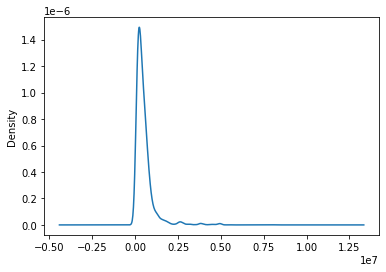

In [8]:
df["selling_price"].plot.density()

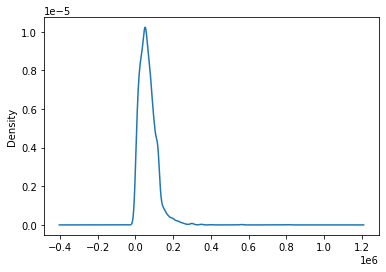

In [9]:
df["km_driven"].plot.density()

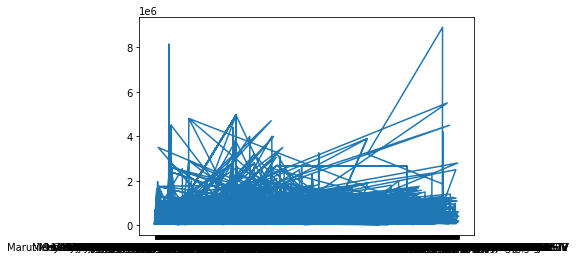

In [10]:
import matplotlib.pyplot as plt
plt.plot(df["name"],df["selling_price"])

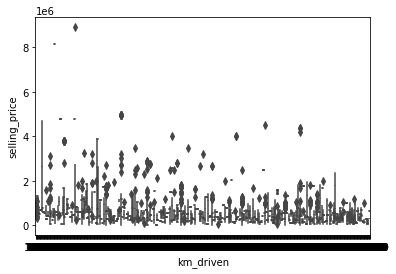

In [11]:
import seaborn as sns
sns.boxplot(x=df['km_driven'],y=df['selling_price'],data=df)